<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/106/val_train_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/val-train-loss/val-train-loss.zip
!unzip -qq val-train-loss.zip
%cd val-train-loss

--2023-02-27 12:11:28--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/val-train-loss/val-train-loss.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.249.218, 3.5.82.199, 3.5.81.139, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.249.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996 (4.9K) [binary/octet-stream]
Saving to: ‘val-train-loss.zip’

val-train-loss.zip  100%[===================>]   4.88K  --.-KB/s    in 0s      

2023-02-27 12:11:29 (14.9 MB/s) - ‘val-train-loss.zip’ saved [4996/4996]

/content/val-train-loss


In [19]:
import argparse
import pickle

from sklearn.metrics import classification_report
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
import numpy as np

from pyimagesearch.minivggnet import MiniVGGNet

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Reason 2: Training loss is measured during each epoch, validation loss is measured after each epoch

In [22]:
args = {
    "history": "my_training.pickle"
}

In [5]:
# config
NUM_EPOCHS = 25
INIT_LR = 1e-2
BATCH_SIZE = 32

In [6]:
# grab dataset
print("[INFO] loading Fashion MNIST dataset...")
((train_x, train_y), (test_x, test_y)) = fashion_mnist.load_data()

# using channels-last ordering
# design matrix shape: num_samples x rows x cols x depth
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

# scale to [0, 1]
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

# one-hot encoding for labels
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

# init label_names
label_names = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

[INFO] loading Fashion MNIST dataset...
4422102/4422102 [==============================] - 0s 0us/step


In [20]:
# init optimizer and model
print("[INFO] compiling model...")

lr_schedule = PolynomialDecay(initial_learning_rate=INIT_LR, decay_steps=10000)
opt = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False)
model = MiniVGGNet.build(width=28, height=28, depth=1, classes=10)
# compile model
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

# train network
print("[INFO] training network...")
H = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS
)

[INFO] compiling model...
[INFO] training network...
Epoch 1/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5504 - accuracy: 0.8196 - val_loss: 0.3510 - val_accuracy: 0.8751
Epoch 2/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3476 - accuracy: 0.8789 - val_loss: 0.2714 - val_accuracy: 0.9022
Epoch 3/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2931 - accuracy: 0.8957 - val_loss: 0.2604 - val_accuracy: 0.9058
Epoch 4/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2600 - accuracy: 0.9065 - val_loss: 0.2494 - val_accuracy: 0.9088
Epoch 5/25
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2339 - accuracy: 0.9156 - val_loss: 0.2168 - val_accuracy: 0.9212
Epoch 6/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2203 - accuracy: 0.9203 - val_loss: 0.2130 - val_accuracy: 0.9240
Epoch 7/25
1875/1875 [==============================] - 14s 8ms/step - loss: 

In [23]:
# evaluate model
print("[INFO] evaluating network...")
preds = model.predict(test_x, batch_size=BATCH_SIZE)
print(
    classification_report(
        test_y.argmax(axis=1),
        preds.argmax(axis=1),
        target_names=label_names
    )
)

# serialize training history to disk
print("[INFO] serializing training history...")
with open(args["history"], "wb") as f:
    f.write(pickle.dumps(H.history))

[INFO] evaluating network...
313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

         top       0.88      0.87      0.87      1000
     trouser       1.00      0.98      0.99      1000
    pullover       0.89      0.90      0.89      1000
       dress       0.92      0.93      0.92      1000
        coat       0.87      0.91      0.89      1000
      sandal       0.99      0.98      0.99      1000
       shirt       0.78      0.75      0.77      1000
     sneaker       0.95      0.99      0.97      1000
         bag       0.99      0.98      0.99      1000
  ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[INFO] serializing training history...


### Shifting our training losses

In [24]:
args = {
    "input": "my_training.pickle"
}

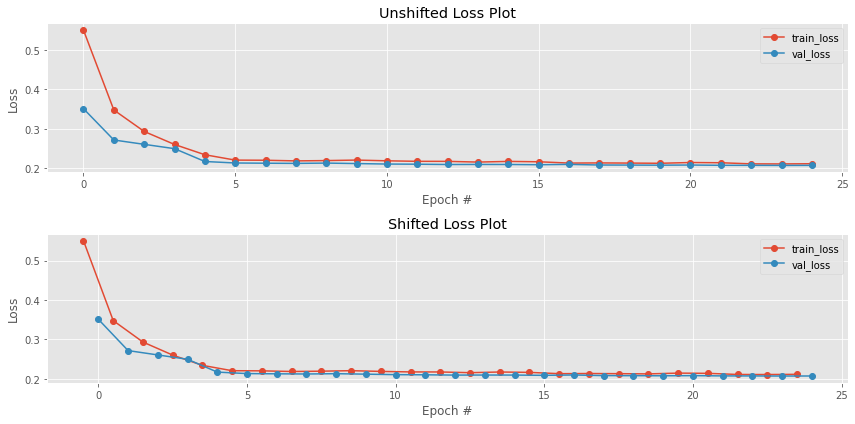

In [25]:
# load training history
H = pickle.loads(open(args["input"], "rb").read())

epochs = np.arange(0, len(H["loss"]))
plt.style.use("ggplot")
(fig, ax) = plt.subplots(ncols=1, nrows=2, figsize=(12, 6))

# plot unshifted training and validation losses
ax[0].plot(epochs, H["loss"], "-o", label="train_loss")
ax[0].plot(epochs, H["val_loss"], "-o", label="val_loss")
ax[0].set_title("Unshifted Loss Plot")
ax[0].set_xlabel("Epoch #")
ax[0].set_ylabel("Loss")
ax[0].legend(loc="upper right")

# plot shifted training and validation losses
ax[1].plot(epochs - 0.5, H["loss"], "-o", label="train_loss")
ax[1].plot(epochs, H["val_loss"], "-o", label="val_loss")
ax[1].set_title("Shifted Loss Plot")
ax[1].set_xlabel("Epoch #")
ax[1].set_ylabel("Loss")
ax[1].legend(loc="upper right")

fig.tight_layout()
plt.show()